In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys

In [2]:
print(tf.__version__)
print(sys.version)
print(tf.config.list_physical_devices("GPU"))

2.10.0
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_data_dir = r"D:\CNNtest\MAIN_WORK_FOLDER\Working_Data\new plates\train"
valid_data_dir = r"D:\CNNtest\MAIN_WORK_FOLDER\Working_Data\new plates\valid"
test_data_dir = r"D:\CNNtest\MAIN_WORK_FOLDER\Working_Data\new plates\test"

# Loading Images into Tensor Datasets

In [4]:
train_ds_224 = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                           label_mode="categorical",
                                                           shuffle=True,
                                                           image_size=(224,224),
                                                           batch_size=32)

valid_ds_224 = tf.keras.utils.image_dataset_from_directory(valid_data_dir,
                                                           label_mode="categorical",
                                                           shuffle=True,
                                                           image_size=(224,224),
                                                           batch_size=32)

test_ds_224 = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                          label_mode="categorical",
                                                          shuffle=True,
                                                          image_size=(224,224),
                                                          batch_size=32)

Found 8161 files belonging to 56 classes.
Found 280 files belonging to 56 classes.
Found 280 files belonging to 56 classes.


In [5]:
class_labels = train_ds_224.class_names

# Creating Callbacks for Tensorboard and ModelSaveCheckPoint

In [102]:
def create_tensorboard_callback(extra_name):
    file_path ="D:\\CNNtest\\MAIN_WORK_FOLDER\\Number_Plate_Question\\TensorBoardCallback\\" + extra_name
    callback_obj = tf.keras.callbacks.TensorBoard(log_dir=file_path)
    print(f"Created Callback in {file_path}")
    return callback_obj

In [103]:
def create_modelsave_callback(extra_name):
    file_path = "D:\\CNNtest\\MAIN_WORK_FOLDER\\Number_Plate_Question\\ModelSaveCheckPoints\\" + extra_name + "_{epoch:02d}.ckpt"
    callback_obj = tf.keras.callbacks.ModelCheckpoint(file_path,
                                                      verbose=1,
                                                      save_weights_only=True,
                                                      save_freq="epoch")
    return callback_obj

# Experimenting Trainable(Default Or True) and Sequential API

In [6]:
base_model1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model1.trainable=True

In [7]:
base_model1.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [8]:
number_plates_model = tf.keras.models.Sequential([base_model1,
                                                  tf.keras.layers.GlobalAveragePooling2D(),
                                                  tf.keras.layers.Dense(56,activation="softmax")]) 

In [9]:
number_plates_model.compile(loss="categorical_crossentropy",
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["accuracy"])

In [11]:
number_plates_model.fit(train_ds_224,
                        epochs=5,
                        steps_per_epoch=len(train_ds_224),
                        validation_data=valid_ds_224,
                        validation_steps=len(valid_ds_224))

Epoch 1/5
256/256 [==============================] - 62s 199ms/step - loss: 1.5441 - accuracy: 0.6407 - val_loss: 0.5395 - val_accuracy: 0.8571
Epoch 2/5
256/256 [==============================] - 49s 193ms/step - loss: 0.2851 - accuracy: 0.9300 - val_loss: 0.3458 - val_accuracy: 0.9250
Epoch 3/5
256/256 [==============================] - 50s 195ms/step - loss: 0.1123 - accuracy: 0.9721 - val_loss: 0.2740 - val_accuracy: 0.9536
Epoch 4/5
256/256 [==============================] - 51s 197ms/step - loss: 0.1072 - accuracy: 0.9700 - val_loss: 0.4438 - val_accuracy: 0.9107
Epoch 5/5
256/256 [==============================] - 52s 201ms/step - loss: 0.0870 - accuracy: 0.9745 - val_loss: 0.3930 - val_accuracy: 0.8964


In [12]:
number_plates_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 56)                71736     
                                                                 
Total params: 4,121,307
Trainable params: 4,079,284
Non-trainable params: 42,023
_________________________________________________________________


# Expermenting Trainable(Default or True) and Funtional API(training=False)

In [13]:
base_model2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model2.trainable=True

In [14]:
base_model2.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [15]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model2(input_layer,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

In [16]:
model2 =  tf.keras.Model(input_layer,output_layer)

In [17]:
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [18]:
model2.fit(train_ds_224,
           epochs=5,
           steps_per_epoch=len(train_ds_224),
           validation_data=valid_ds_224,
           validation_steps=len(valid_ds_224))

Epoch 1/5
256/256 [==============================] - 59s 205ms/step - loss: 4.0765 - accuracy: 0.0178 - val_loss: 4.0255 - val_accuracy: 0.0179
Epoch 2/5
256/256 [==============================] - 53s 205ms/step - loss: 61.0484 - accuracy: 0.0207 - val_loss: 4.0257 - val_accuracy: 0.0179
Epoch 3/5
256/256 [==============================] - 53s 205ms/step - loss: 4.0238 - accuracy: 0.0185 - val_loss: 4.0260 - val_accuracy: 0.0179
Epoch 4/5
256/256 [==============================] - 53s 206ms/step - loss: 4.0233 - accuracy: 0.0186 - val_loss: 4.0264 - val_accuracy: 0.0179
Epoch 5/5
256/256 [==============================] - 53s 207ms/step - loss: 4.0229 - accuracy: 0.0190 - val_loss: 4.0267 - val_accuracy: 0.0179


In [19]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 56)                71736     
                                                                 
Total params: 4,121,307
Trainable params: 4,079,284
Non-trainable params: 42,023
_________________________________________________________________


# Experimenting Trainable(True or Default) and Functional API(training=Default)

In [20]:
base_model3= tf.keras.applications.EfficientNetB0(include_top=False)
base_model3.trainable=True

In [21]:
base_model3.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [22]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model3(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

In [23]:
model3 =  tf.keras.Model(input_layer,output_layer)

In [24]:
model3.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [25]:
model3.fit(train_ds_224,
           epochs=5,
           steps_per_epoch=len(train_ds_224),
           validation_data=valid_ds_224,
           validation_steps=len(valid_ds_224))

Epoch 1/5
256/256 [==============================] - 58s 198ms/step - loss: 1.5724 - accuracy: 0.6319 - val_loss: 0.5818 - val_accuracy: 0.8393
Epoch 2/5
256/256 [==============================] - 50s 196ms/step - loss: 0.2738 - accuracy: 0.9315 - val_loss: 0.2605 - val_accuracy: 0.9393
Epoch 3/5
256/256 [==============================] - 51s 198ms/step - loss: 0.1234 - accuracy: 0.9678 - val_loss: 0.3592 - val_accuracy: 0.9179
Epoch 4/5
256/256 [==============================] - 51s 198ms/step - loss: 0.0988 - accuracy: 0.9721 - val_loss: 0.4154 - val_accuracy: 0.9250
Epoch 5/5
256/256 [==============================] - 51s 199ms/step - loss: 0.0963 - accuracy: 0.9716 - val_loss: 0.3462 - val_accuracy: 0.9357


In [26]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 56)                71736     
                                                                 
Total params: 4,121,307
Trainable params: 4,079,284
Non-trainable params: 42,023
_________________________________________________________________


# Experimenting Trainable(True or Default) and Functional API(training=true)

In [27]:
base_model4 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model4.trainable=True

In [28]:
base_model4.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_6 (Rescaling)        (None, None, None,   0           ['input_6[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_6[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [29]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model4(input_layer,training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

In [30]:
model4 =  tf.keras.Model(input_layer,output_layer)

In [31]:
model4.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [32]:
model4.fit(train_ds_224,
           epochs=5,
           steps_per_epoch=len(train_ds_224),
           validation_data=valid_ds_224,
           validation_steps=len(valid_ds_224))

Epoch 1/5
256/256 [==============================] - 58s 197ms/step - loss: 1.5252 - accuracy: 0.6473 - val_loss: 0.4490 - val_accuracy: 0.8929
Epoch 2/5
256/256 [==============================] - 51s 198ms/step - loss: 0.2739 - accuracy: 0.9338 - val_loss: 0.2823 - val_accuracy: 0.9321
Epoch 3/5
256/256 [==============================] - 51s 199ms/step - loss: 0.1169 - accuracy: 0.9703 - val_loss: 0.2729 - val_accuracy: 0.9393
Epoch 4/5
256/256 [==============================] - 51s 200ms/step - loss: 0.0952 - accuracy: 0.9757 - val_loss: 0.2634 - val_accuracy: 0.9464
Epoch 5/5
256/256 [==============================] - 51s 199ms/step - loss: 0.0830 - accuracy: 0.9772 - val_loss: 0.2734 - val_accuracy: 0.9357


# Experimenting Trainable(False) and Sequential API

In [33]:
base_model5 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model5.trainable = False

In [86]:
len(base_model5.trainable_variables)

0

In [34]:
base_model5.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_8 (Rescaling)        (None, None, None,   0           ['input_8[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_4 (Normalization  (None, None, None,   7          ['rescaling_8[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [35]:
model5 = tf.keras.models.Sequential([base_model5,
                                                  tf.keras.layers.GlobalAveragePooling2D(),
                                                  tf.keras.layers.Dense(56,activation="softmax")])

In [36]:
model5.compile(loss="categorical_crossentropy",
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["accuracy"])

In [38]:
model5.fit(train_ds_224,
                        epochs=5,
                        steps_per_epoch=len(train_ds_224),
                        validation_data=valid_ds_224,
                        validation_steps=len(valid_ds_224))

Epoch 1/5
256/256 [==============================] - 21s 66ms/step - loss: 3.4099 - accuracy: 0.2198 - val_loss: 2.9378 - val_accuracy: 0.3500
Epoch 2/5
256/256 [==============================] - 16s 62ms/step - loss: 2.5991 - accuracy: 0.4234 - val_loss: 2.5199 - val_accuracy: 0.4179
Epoch 3/5
256/256 [==============================] - 16s 61ms/step - loss: 2.2221 - accuracy: 0.5020 - val_loss: 2.2763 - val_accuracy: 0.4714
Epoch 4/5
256/256 [==============================] - 16s 61ms/step - loss: 1.9805 - accuracy: 0.5591 - val_loss: 2.1262 - val_accuracy: 0.5000
Epoch 5/5
256/256 [==============================] - 16s 61ms/step - loss: 1.8154 - accuracy: 0.5911 - val_loss: 1.9972 - val_accuracy: 0.5214


In [39]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 56)                71736     
                                                                 
Total params: 4,121,307
Trainable params: 71,736
Non-trainable params: 4,049,571
_________________________________________________________________


# EXPERIMENTING trainable(False) and Functional API(training=False)

In [40]:
base_model6 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model6.trainable = False

In [41]:
base_model6.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_10 (Rescaling)       (None, None, None,   0           ['input_9[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_5 (Normalization  (None, None, None,   7          ['rescaling_10[0][0]']           
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [42]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model6(input_layer,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

In [43]:
model6 = tf.keras.Model(input_layer,output_layer)

In [44]:
model6.compile(loss="categorical_crossentropy",
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics=["accuracy"])

In [45]:
model6.fit(train_ds_224,
                                epochs=10,
                                steps_per_epoch=len(train_ds_224),
                                validation_data=valid_ds_224,
                                validation_steps=len(valid_ds_224))

Epoch 1/10
256/256 [==============================] - 21s 64ms/step - loss: 3.3424 - accuracy: 0.2517 - val_loss: 2.8762 - val_accuracy: 0.3571
Epoch 2/10
256/256 [==============================] - 16s 60ms/step - loss: 2.4966 - accuracy: 0.4534 - val_loss: 2.4565 - val_accuracy: 0.4250
Epoch 3/10
256/256 [==============================] - 15s 60ms/step - loss: 2.1048 - accuracy: 0.5387 - val_loss: 2.2307 - val_accuracy: 0.4857
Epoch 4/10
256/256 [==============================] - 15s 59ms/step - loss: 1.8608 - accuracy: 0.5860 - val_loss: 2.0761 - val_accuracy: 0.5214
Epoch 5/10
256/256 [==============================] - 15s 60ms/step - loss: 1.6795 - accuracy: 0.6274 - val_loss: 1.9594 - val_accuracy: 0.5464
Epoch 6/10
256/256 [==============================] - 15s 60ms/step - loss: 1.5367 - accuracy: 0.6612 - val_loss: 1.8764 - val_accuracy: 0.5571
Epoch 7/10
256/256 [==============================] - 15s 60ms/step - loss: 1.4227 - accuracy: 0.6902 - val_loss: 1.8112 - val_accuracy:

In [46]:
model6.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 56)                71736     
                                                                 
Total params: 4,121,307
Trainable params: 71,736
Non-trainable params: 4,049,571
_________________________________________________________________


# Experimenting Trainable(False) with Functional API(training=True)

In [47]:
base_model7 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model7.trainable = False

In [48]:
base_model7.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_12 (Rescaling)       (None, None, None,   0           ['input_11[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_6 (Normalization  (None, None, None,   7          ['rescaling_12[0][0]']           
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [50]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model7(input_layer,training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

In [51]:
model7 = tf.keras.Model(input_layer,output_layer)

In [52]:
model7.compile(loss="categorical_crossentropy",
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics=["accuracy"])

In [53]:
model7.fit(train_ds_224,
                                epochs=10,
                                steps_per_epoch=len(train_ds_224),
                                validation_data=valid_ds_224,
                                validation_steps=len(valid_ds_224))

Epoch 1/10
256/256 [==============================] - 21s 66ms/step - loss: 3.4029 - accuracy: 0.2267 - val_loss: 2.9528 - val_accuracy: 0.3357
Epoch 2/10
256/256 [==============================] - 16s 62ms/step - loss: 2.5917 - accuracy: 0.4301 - val_loss: 2.5518 - val_accuracy: 0.3786
Epoch 3/10
256/256 [==============================] - 16s 62ms/step - loss: 2.2203 - accuracy: 0.5012 - val_loss: 2.3207 - val_accuracy: 0.4464
Epoch 4/10
256/256 [==============================] - 16s 63ms/step - loss: 1.9844 - accuracy: 0.5562 - val_loss: 2.1590 - val_accuracy: 0.5071
Epoch 5/10
256/256 [==============================] - 16s 63ms/step - loss: 1.8091 - accuracy: 0.5902 - val_loss: 2.1008 - val_accuracy: 0.5107
Epoch 6/10
256/256 [==============================] - 16s 63ms/step - loss: 1.6775 - accuracy: 0.6231 - val_loss: 1.9612 - val_accuracy: 0.5500
Epoch 7/10
256/256 [==============================] - 16s 63ms/step - loss: 1.5689 - accuracy: 0.6472 - val_loss: 1.9122 - val_accuracy:

In [ ]:
model7.summary()

# Creating Augmentation DataSet

In [54]:
train_ds_fg = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                          label_mode="categorical",
                                                          shuffle=True,
                                                          batch_size=None)

Found 8161 files belonging to 56 classes.


In [55]:
AUGMEN_FACTOR = 0.12

data_augmen_model = tf.keras.models.Sequential([tf.keras.layers.RandomRotation(factor=AUGMEN_FACTOR),
                                                tf.keras.layers.RandomContrast(factor=AUGMEN_FACTOR),
                                                tf.keras.layers.Resizing(224,224)])

In [56]:
train_ds_aug  = train_ds_fg.map(map_func=lambda x,y:(data_augmen_model(x,training=True),y),
                                num_parallel_calls=tf.data.AUTOTUNE)

In [57]:
train_ds_aug = train_ds_aug.batch(32)

In [58]:
images, labels = next(iter(train_ds_aug))

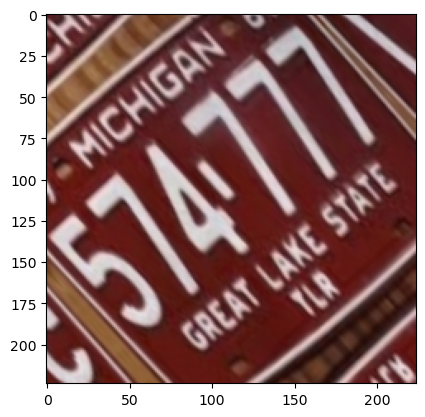

In [66]:
import random 

ran = random.randint(0,31)
plt.imshow(images[ran]/255.0);

In [67]:
train_ds_aug

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 56), dtype=tf.float32, name=None))>

# Experimenting Augmentation with Trainable(False) using Functional API(training=False)

In [69]:
base_model8 = tf.keras.applications.EfficientNetB0(include_top=False)

In [70]:
base_model8.trainable=False

In [71]:
base_model8.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_16 (Rescaling)       (None, None, None,   0           ['input_15[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_8 (Normalization  (None, None, None,   7          ['rescaling_16[0][0]']           
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [72]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model8(input_layer,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

model8 = tf.keras.Model(input_layer,output_layer)

In [73]:
model8.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [74]:
model8.fit(train_ds_aug,
           epochs=10,
           steps_per_epoch=len(train_ds_aug),
           validation_data=valid_ds_224,
           validation_steps=len(valid_ds_224))

Epoch 1/10
256/256 [==============================] - 22s 66ms/step - loss: 3.4014 - accuracy: 0.2136 - val_loss: 3.1420 - val_accuracy: 0.2964
Epoch 2/10
256/256 [==============================] - 16s 62ms/step - loss: 2.6463 - accuracy: 0.4055 - val_loss: 2.8397 - val_accuracy: 0.3393
Epoch 3/10
256/256 [==============================] - 16s 63ms/step - loss: 2.3023 - accuracy: 0.4795 - val_loss: 2.6185 - val_accuracy: 0.4036
Epoch 4/10
256/256 [==============================] - 16s 62ms/step - loss: 2.0897 - accuracy: 0.5209 - val_loss: 2.5115 - val_accuracy: 0.4286
Epoch 5/10
256/256 [==============================] - 16s 63ms/step - loss: 1.9384 - accuracy: 0.5554 - val_loss: 2.4020 - val_accuracy: 0.4571
Epoch 6/10
256/256 [==============================] - 16s 63ms/step - loss: 1.7977 - accuracy: 0.5851 - val_loss: 2.3158 - val_accuracy: 0.4500
Epoch 7/10
256/256 [==============================] - 16s 63ms/step - loss: 1.6972 - accuracy: 0.6108 - val_loss: 2.2895 - val_accuracy:

# Experimenting Augmentation on Trainable(True) and Sequential API

In [75]:
base_model9 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model9.trainable=True

In [76]:
base_model9.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_18 (Rescaling)       (None, None, None,   0           ['input_17[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_9 (Normalization  (None, None, None,   7          ['rescaling_18[0][0]']           
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [77]:
model9 = tf.keras.models.Sequential([base_model9,
                                     tf.keras.layers.GlobalAveragePooling2D(),
                                     tf.keras.layers.Dense(56,activation="softmax")])

In [78]:
model9.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [79]:
model9.fit(train_ds_aug,
           epochs=10,
           steps_per_epoch=len(train_ds_aug),
           validation_data=valid_ds_224,
           validation_steps=len(valid_ds_224))

Epoch 1/10
256/256 [==============================] - 57s 195ms/step - loss: 1.9853 - accuracy: 0.5252 - val_loss: 1.1743 - val_accuracy: 0.7214
Epoch 2/10
256/256 [==============================] - 49s 192ms/step - loss: 0.5949 - accuracy: 0.8494 - val_loss: 0.5627 - val_accuracy: 0.8429
Epoch 3/10
256/256 [==============================] - 50s 192ms/step - loss: 0.3042 - accuracy: 0.9212 - val_loss: 0.4299 - val_accuracy: 0.9143
Epoch 4/10
256/256 [==============================] - 50s 193ms/step - loss: 0.2135 - accuracy: 0.9420 - val_loss: 0.3102 - val_accuracy: 0.9321
Epoch 5/10
256/256 [==============================] - 50s 196ms/step - loss: 0.1729 - accuracy: 0.9511 - val_loss: 0.4382 - val_accuracy: 0.9143
Epoch 6/10
256/256 [==============================] - 50s 196ms/step - loss: 0.1343 - accuracy: 0.9609 - val_loss: 0.4746 - val_accuracy: 0.9107
Epoch 7/10
256/256 [==============================] - 51s 196ms/step - loss: 0.1248 - accuracy: 0.9647 - val_loss: 0.5483 - val_ac

# Fine Tuning On Model8

In [81]:
base_model8.trainable = True

In [82]:
base_model8.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_16 (Rescaling)       (None, None, None,   0           ['input_15[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_8 (Normalization  (None, None, None,   7          ['rescaling_16[0][0]']           
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [87]:
len(base_model8.trainable_weights)

211

In [89]:
for layer_number, layer in enumerate(base_model8.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_15 True
1 rescaling_16 True
2 normalization_8 True
3 rescaling_17 True
4 stem_conv_pad True
5 stem_conv True
6 stem_bn True
7 stem_activation True
8 block1a_dwconv True
9 block1a_bn True
10 block1a_activation True
11 block1a_se_squeeze True
12 block1a_se_reshape True
13 block1a_se_reduce True
14 block1a_se_expand True
15 block1a_se_excite True
16 block1a_project_conv True
17 block1a_project_bn True
18 block2a_expand_conv True
19 block2a_expand_bn True
20 block2a_expand_activation True
21 block2a_dwconv_pad True
22 block2a_dwconv True
23 block2a_bn True
24 block2a_activation True
25 block2a_se_squeeze True
26 block2a_se_reshape True
27 block2a_se_reduce True
28 block2a_se_expand True
29 block2a_se_excite True
30 block2a_project_conv True
31 block2a_project_bn True
32 block2b_expand_conv True
33 block2b_expand_bn True
34 block2b_expand_activation True
35 block2b_dwconv True
36 block2b_bn True
37 block2b_activation True
38 block2b_se_squeeze True
39 block2b_se_reshape True
40 bloc

In [91]:
for layer in base_model8.layers[:-20]:
  layer.trainable = False

In [92]:
for layer_number, layer in enumerate(base_model8.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_15 False
1 rescaling_16 False
2 normalization_8 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [93]:
len(base_model8.trainable_variables)

19

In [94]:
base_model8.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_16 (Rescaling)       (None, None, None,   0           ['input_15[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_8 (Normalization  (None, None, None,   7          ['rescaling_16[0][0]']           
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 1,350,960
Non-trainable params: 2,698,611
__________________________________________________________________________________________________


In [95]:
model8.fit(train_ds_aug,
           epochs=20,
           initial_epoch=10,
           steps_per_epoch=len(train_ds_aug),
           validation_data=valid_ds_224,
           validation_steps=len(valid_ds_224))

Epoch 11/20
256/256 [==============================] - 17s 63ms/step - loss: 1.4141 - accuracy: 0.6727 - val_loss: 2.1142 - val_accuracy: 0.5107
Epoch 12/20
256/256 [==============================] - 17s 63ms/step - loss: 1.3574 - accuracy: 0.6823 - val_loss: 2.1002 - val_accuracy: 0.5071
Epoch 13/20
256/256 [==============================] - 16s 63ms/step - loss: 1.3193 - accuracy: 0.6913 - val_loss: 2.0497 - val_accuracy: 0.5179
Epoch 14/20
256/256 [==============================] - 16s 63ms/step - loss: 1.2799 - accuracy: 0.7035 - val_loss: 2.0408 - val_accuracy: 0.5250
Epoch 15/20
256/256 [==============================] - 17s 63ms/step - loss: 1.2285 - accuracy: 0.7138 - val_loss: 2.0145 - val_accuracy: 0.5286
Epoch 16/20
256/256 [==============================] - 17s 64ms/step - loss: 1.1844 - accuracy: 0.7248 - val_loss: 2.0165 - val_accuracy: 0.5286
Epoch 17/20
256/256 [==============================] - 17s 63ms/step - loss: 1.1547 - accuracy: 0.7342 - val_loss: 1.9724 - val_ac

# Fine Tuning With Re-compiling

In [96]:
base_model_10 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_10.trainable = False

In [97]:
base_model_10.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_20 (Rescaling)       (None, None, None,   0           ['input_18[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_10 (Normalizatio  (None, None, None,   7          ['rescaling_20[0][0]']           
 n)                             3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [99]:
input_layer = tf.keras.Input(shape=(224,224,3))

x = base_model_10(input_layer,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_layer = tf.keras.layers.Dense(56,activation="softmax")(x)

In [100]:
fine_tune_model = tf.keras.Model(input_layer,output_layer)

In [101]:
fine_tune_model.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

In [104]:
fine_tune_model.fit(train_ds_aug,
                    epochs=20,
                    steps_per_epoch=len(train_ds_aug),
                    validation_data=valid_ds_224,
                    validation_steps=len(valid_ds_224),
                    callbacks=[create_tensorboard_callback("FineTuneModel"),
                               create_modelsave_callback("FineTuneModel")])

Created Callback in D:\CNNtest\MAIN_WORK_FOLDER\Number_Plate_Question\TensorBoardCallback\FineTuneModel
Epoch 1/20
255/256 [============================>.] - ETA: 0s - loss: 3.3882 - accuracy: 0.2218
Epoch 1: saving model to D:\CNNtest\MAIN_WORK_FOLDER\Number_Plate_Question\ModelSaveCheckPoints\FineTuneModel_01.ckpt
256/256 [==============================] - 23s 72ms/step - loss: 3.3882 - accuracy: 0.2218 - val_loss: 3.1366 - val_accuracy: 0.2607
Epoch 2/20
255/256 [============================>.] - ETA: 0s - loss: 2.6410 - accuracy: 0.3994
Epoch 2: saving model to D:\CNNtest\MAIN_WORK_FOLDER\Number_Plate_Question\ModelSaveCheckPoints\FineTuneModel_02.ckpt
256/256 [==============================] - 17s 66ms/step - loss: 2.6411 - accuracy: 0.3993 - val_loss: 2.8234 - val_accuracy: 0.3429
Epoch 3/20
255/256 [============================>.] - ETA: 0s - loss: 2.3130 - accuracy: 0.4743
Epoch 3: saving model to D:\CNNtest\MAIN_WORK_FOLDER\Number_Plate_Question\ModelSaveCheckPoints\FineTuneMo

# With Re-compiling and just unfrezing Top 20 layers

In [106]:
base_model_10.trainable = True

In [107]:
for layer in base_model_10.layers[:-20]:
  layer.trainable = False

In [108]:
base_model_10.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_20 (Rescaling)       (None, None, None,   0           ['input_18[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_10 (Normalizatio  (None, None, None,   7          ['rescaling_20[0][0]']           
 n)                             3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 1,350,960
Non-trainable params: 2,698,611
__________________________________________________________________________________________________


In [109]:
for layer_number, layer in enumerate(base_model_10.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_18 False
1 rescaling_20 False
2 normalization_10 False
3 rescaling_21 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [110]:
len(base_model_10.trainable_variables)

19

In [113]:
fine_tune_model.compile(loss="categorical_crossentropy", 
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["accuracy"])

In [114]:
fine_tune_model.fit(train_ds_aug,
                    epochs=40,
                    initial_epoch=20,
                    steps_per_epoch=len(train_ds_aug),
                    validation_data=valid_ds_224,
                    validation_steps=len(valid_ds_224))

Epoch 21/40
256/256 [==============================] - 23s 72ms/step - loss: 0.8956 - accuracy: 0.7712 - val_loss: 1.7380 - val_accuracy: 0.6036
Epoch 22/40
256/256 [==============================] - 18s 68ms/step - loss: 0.7420 - accuracy: 0.8020 - val_loss: 1.6986 - val_accuracy: 0.6143
Epoch 23/40
256/256 [==============================] - 18s 68ms/step - loss: 0.6402 - accuracy: 0.8267 - val_loss: 1.6101 - val_accuracy: 0.6464
Epoch 24/40
256/256 [==============================] - 18s 69ms/step - loss: 0.5379 - accuracy: 0.8542 - val_loss: 1.5505 - val_accuracy: 0.6536
Epoch 25/40
256/256 [==============================] - 18s 69ms/step - loss: 0.4710 - accuracy: 0.8733 - val_loss: 1.6024 - val_accuracy: 0.6500
Epoch 26/40
256/256 [==============================] - 18s 69ms/step - loss: 0.4026 - accuracy: 0.8919 - val_loss: 1.5444 - val_accuracy: 0.6571
Epoch 27/40
256/256 [==============================] - 18s 70ms/step - loss: 0.3423 - accuracy: 0.9077 - val_loss: 1.5476 - val_ac

In [115]:
fine_tune_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_11  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 56)                71736     
                                                                 
Total params: 4,121,307
Trainable params: 1,422,696
Non-trainable params: 2,698,611
_________________________________________________________________
